<a href="https://colab.research.google.com/github/Suchitra90/My_python_projects/blob/main/Revenue_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import method for suppressing warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore',ConvergenceWarning)

In [ ]:
# Upload the dataset
df = pd.read_csv('/content/drive/MyDrive/revenue_prediction.csv')

In [ ]:
# Read the contents in the dataframe
df

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...,...
95,196,Wetzel'sPretzels,No,Italian/Pizza,Bengaluru,19,1.1,1270499
96,197,LaMadeleineCountryFrenchCafe,Yes,Varied Menu,Bengaluru,75,6.3,6412623
97,198,Giordano's,Yes,Varied Menu,Gurugram,77,6.2,6694797
98,199,IslandsFineBurgers&Drinks,Yes,Sports Bar,Pune,25,2.1,2344689


In [ ]:
# Check for null values - There are no null values
df.isnull().sum()

,0
Id,0
Name,0
Franchise,0
Category,0
City,0
No_Of_Item,0
Order_Placed,0
Revenue,0


In [ ]:
# Check for duplicates - No duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
# Check for data types of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [ ]:
# Check for unique values in city column
df['City'].unique()

array(['Bengaluru', 'Gurugram', 'Pune', 'Mumbai', 'Noida'], dtype=object)

In [ ]:
# Check for unique values in Category column
df['Category'].unique()

array(['Mexican', 'Varied Menu', 'Chicken', 'Italian/Pizza', 'Pizza',
       'Seafood', 'Steak', 'Frozen Desserts', 'Coffee Cafe', 'BBQ',
       'Sandwich', 'Bakery Cafe', 'Burger', 'Asian', 'Family Style',
       'Sports Bar', 'Asian/Noodle', 'Family Casual', 'Snack', 'Healthy'],
      dtype=object)

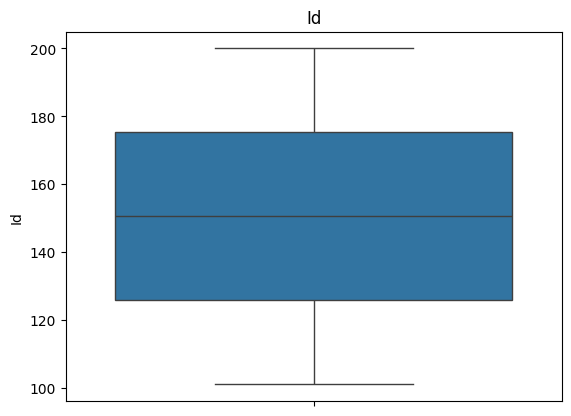

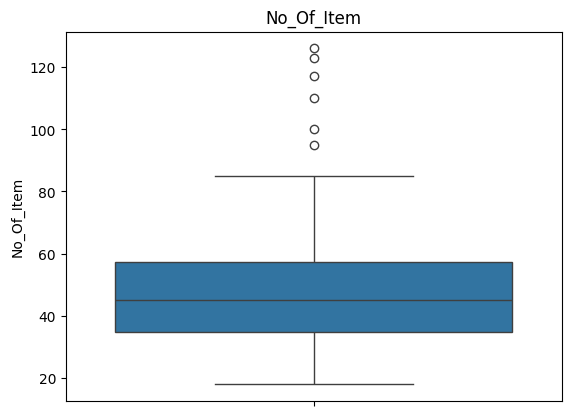

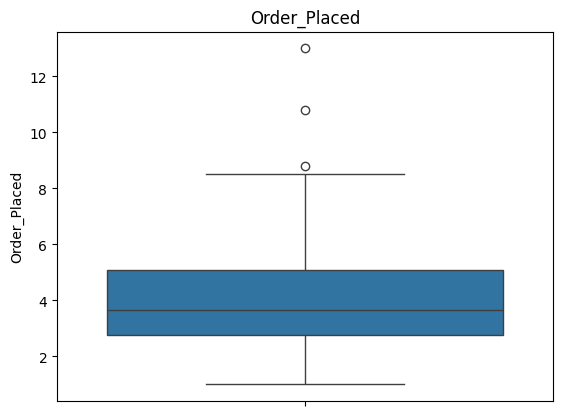

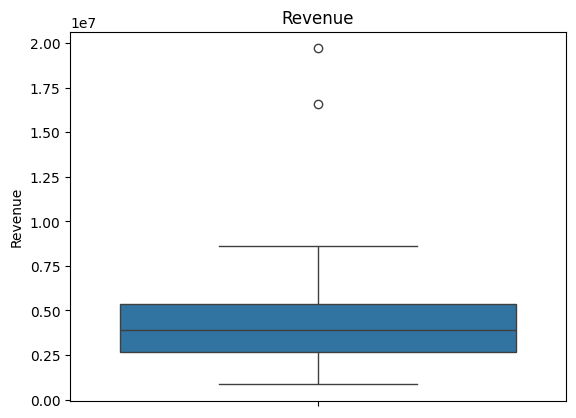

In [ ]:
# Check for outliers
for col in df.columns:
  if df[col].dtype != 'object':
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

No need of removing the outliers as the dataset is small

In [ ]:
df.columns

Index(['Id', 'Name', 'Franchise', 'Category', 'City', 'No_Of_Item',
       'Order_Placed', 'Revenue'],
      dtype='object')

In [ ]:
# Do label encoding for object columns
label_mapping = {}
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])
    label_mapping[col] = dict(zip(le.classes_,le.transform(le.classes_)))
for column,mapping in label_mapping.items():
  print(f'mapping for {column} : {mapping}')

mapping for Name : {'A&WAll-AmericanFood': np.int64(0), 'AuBonPain': np.int64(1), 'BahamaBreezeIslandGrille': np.int64(2), 'BarLouie': np.int64(3), 'Benihana': np.int64(4), "BigBoy/Frisch'sBigBoy": np.int64(5), 'BlackBearDiner': np.int64(6), 'BlazePizza': np.int64(7), "Braum'sIceCream&DairyStores": np.int64(8), 'BrioTuscanGrille': np.int64(9), 'BubbaGumpShrimpCo.': np.int64(10), 'BucadiBeppo': np.int64(11), 'CafeRioMexicanGrill': np.int64(12), 'CaribouCoffee': np.int64(13), 'CharleysPhillySteaks': np.int64(14), "ChuckE.Cheese's": np.int64(15), "Chuy's": np.int64(16), 'Cicis': np.int64(17), 'Cinnabon': np.int64(18), 'ClaimJumper': np.int64(19), 'ColdStoneCreamery': np.int64(20), "Cooper'sHawkWinery&Restaurants": np.int64(21), 'CornerBakery_Cafe': np.int64(22), "DelFrisco'sDoubleEagleSteakHouse": np.int64(23), "Dickey'sBarbecuePit": np.int64(24), 'DonatosPizza': np.int64(25), "FamousDave's": np.int64(26), 'FarmerBoys': np.int64(27), "Fazoli's": np.int64(28), 'FirebirdsWoodFiredGrill': np

## Model Building

### Linear Regression model

In [ ]:
# Split the data for x,y-axis
x = df.drop(columns='Revenue')
y = df['Revenue']

In [ ]:
# Split the data for training and testing purpose
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Import required model and train it
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Predict the values for test data
y_predict = model.predict(x_test)

In [ ]:
# Check for different metrics
from sklearn.metrics import *
r2 = r2_score(y_test,y_predict)*100
rms = np.round(root_mean_squared_error(y_test,y_predict)*100,2)
mas = np.round(mean_absolute_error(y_test,y_predict)*100,2)
msa = np.round(mean_squared_error(y_test,y_predict)*100,2)


In [ ]:
Results = pd.DataFrame(index=[0],data={'Model':'Linear Regression','RMSE':rms,'R2 Score':r2,'Mean Absolute Error':mas,'Mean Squared Error':msa})
Results.set_index('Model',inplace=True)
Results

,RMSE,R2 Score,Mean Absolute Error,Mean Squared Error
Model,,,,
Linear Regression,44920889.29,86.21904,36178315.91,2.017886e+13


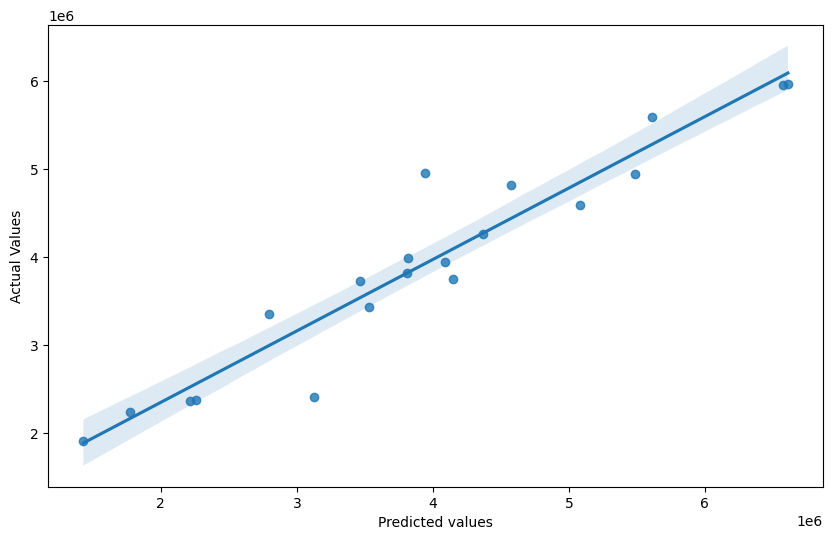

In [ ]:
# Draw the plot for best fit line
plt.figure(figsize = (10,6))
sns.regplot(x = y_predict,y = y_test)
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.show()

### Decision Tree Regressier

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Check for optimum depth for decision tree
max_depth = [2,3,4,5,6,7,8,9,10]
for i in max_depth:
  model = DecisionTreeRegressor(max_depth=i,random_state=42)
  model.fit(x_train,y_train)
  y_predict = model.predict(x_test)
  r2 = r2_score(y_test,y_predict)*100
  print(f'r2 score of model for depth {i} : {r2}')

r2 score of model for depth 2 : 27.767475782163608
r2 score of model for depth 3 : 75.36324136681324
r2 score of model for depth 4 : 82.69122157423647
r2 score of model for depth 5 : 77.15830881455508
r2 score of model for depth 6 : 81.67815558224734
r2 score of model for depth 7 : 79.3616749354332
r2 score of model for depth 8 : 79.02889653949143
r2 score of model for depth 9 : 80.96888553841703
r2 score of model for depth 10 : 76.26460829418494


In [ ]:
# From the above loop we can say that r2 score is more at depth of 4 so let us apply it
model = DecisionTreeRegressor(max_depth=4,random_state=42)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

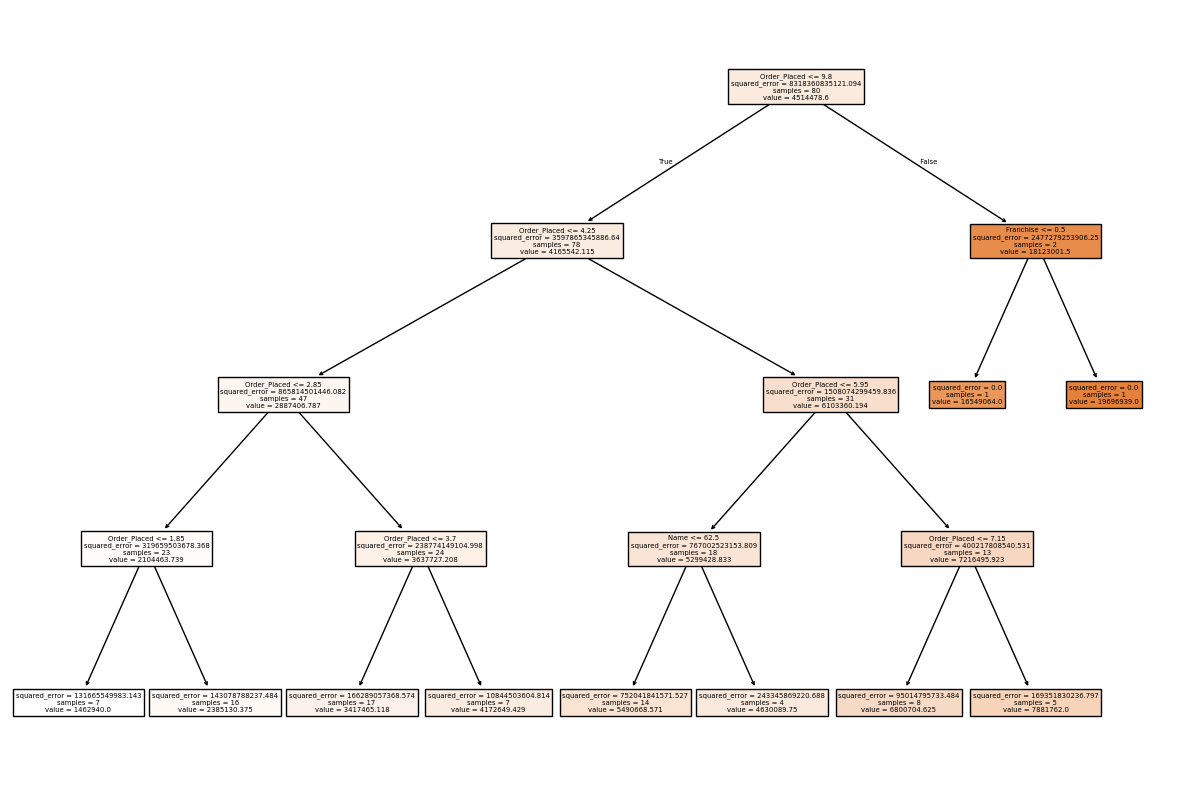

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree = tree.plot_tree(model,feature_names=x.columns,filled=True)

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
# Check for different metrics
from sklearn.metrics import *
r2 = r2_score(y_test,y_predict)*100
rms = np.round(root_mean_squared_error(y_test,y_predict)*100,2)
mas = np.round(mean_absolute_error(y_test,y_predict)*100,2)
msa = np.round(mean_squared_error(y_test,y_predict)*100,2)

In [ ]:
Results1 = pd.DataFrame(index=[0],data={'Model':'Decision Tree','RMSE':rms,'R2 Score':r2,'Mean Absolute Error':mas,'Mean Squared Error':msa})
Results1.set_index('Model',inplace=True)
Results = pd.concat([Results,Results1])
Results

,RMSE,R2 Score,Mean Absolute Error,Mean Squared Error
Model,,,,
Linear Regression,44920889.29,86.219040,36178315.91,2.017886e+13
Decision Tree,50343315.40,82.691222,40373842.57,2.534449e+13


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
Decision_tree = [50,100,150,200,250,300,350,400,450,500]
for i in Decision_tree:
  model = RandomForestRegressor(n_estimators=i,random_state=42)
  model.fit(x_train,y_train)
  y_predict = model.predict(x_test)
  r2 = r2_score(y_test,y_predict)*100
  print(f'r2 score for decision trees of {i} is {r2}')

r2 score for decision trees of 50 is 80.17555628962762
r2 score for decision trees of 100 is 80.64755865832136
r2 score for decision trees of 150 is 80.35421886082467
r2 score for decision trees of 200 is 81.62932934828392
r2 score for decision trees of 250 is 81.69281047141806
r2 score for decision trees of 300 is 82.10300059801796
r2 score for decision trees of 350 is 82.1011002709053
r2 score for decision trees of 400 is 81.94885967876495
r2 score for decision trees of 450 is 82.38461412392905
r2 score for decision trees of 500 is 82.71352058022757


In [ ]:
depth = [2,3,4,5,6,7,8,9,10]
for i in depth:
  model = RandomForestRegressor(n_estimators=500,max_depth=i,random_state=42)
  model.fit(x_train,y_train)
  y_predict = model.predict(x_test)
  r2 = r2_score(y_test,y_predict)*100
  print(f'r2 score for depth of {i} is {r2}')

r2 score for depth of 2 is 69.73385130090195
r2 score for depth of 3 is 86.11045004207985
r2 score for depth of 4 is 86.30732994764942
r2 score for depth of 5 is 84.29228262361914
r2 score for depth of 6 is 82.82168584071411
r2 score for depth of 7 is 82.50299043388787
r2 score for depth of 8 is 82.89496574077735
r2 score for depth of 9 is 82.67324765502889
r2 score for depth of 10 is 83.01640153312562


From the above loops we can say that r2 score is more for Decision tress = 500 and depth = 4

In [ ]:
model = RandomForestRegressor(n_estimators=500,max_depth=4,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, n_estimators=500, random_state=42)

In [ ]:
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)*100

86.30732994764942

In [ ]:
# Check for different metrics
from sklearn.metrics import *
r2 = r2_score(y_test,y_predict)*100
rms = np.round(root_mean_squared_error(y_test,y_predict)*100,2)
mas = np.round(mean_absolute_error(y_test,y_predict)*100,2)
msa = np.round(mean_squared_error(y_test,y_predict)*100,2)

In [ ]:
Results1 = pd.DataFrame(index=[0],data={'Model':'Random Forest','RMSE':rms,'R2 Score':r2,'Mean Absolute Error':mas,'Mean Squared Error':msa})
Results1.set_index('Model',inplace=True)
Results = pd.concat([Results,Results1])
Results

,RMSE,R2 Score,Mean Absolute Error,Mean Squared Error
Model,,,,
Linear Regression,44920889.29,86.219040,36178315.91,2.017886e+13
Decision Tree,50343315.40,82.691222,40373842.57,2.534449e+13
Random Forest,44776761.04,86.307330,34971944.36,2.004958e+13


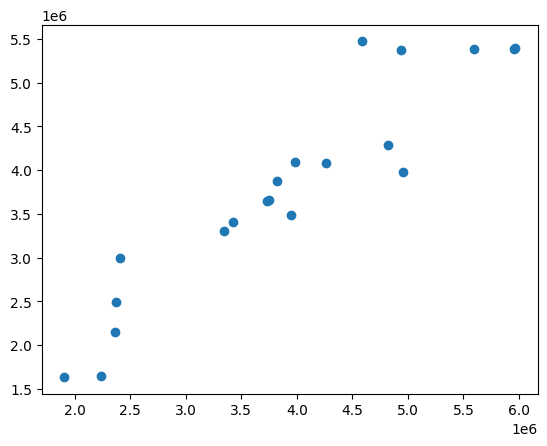

In [ ]:
plt.scatter(y_test,y_predict)
plt.show()

### Principal Component Analysis

In [ ]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
x_train_scaled = se.fit_transform(x_train)
x_test_scaled = se.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [ ]:
model = LinearRegression()
model.fit(x_train_pca,y_train)
y_predict = model.predict(x_test_pca)

In [ ]:
# Check for different metrics
from sklearn.metrics import *
r2 = r2_score(y_test,y_predict)*100
rms = np.round(root_mean_squared_error(y_test,y_predict)*100,2)
mas = np.round(mean_absolute_error(y_test,y_predict)*100,2)
msa = np.round(mean_squared_error(y_test,y_predict)*100,2)

In [ ]:
Results1 = pd.DataFrame(index=[0],data={'Model':'Linear Regression after PCA','RMSE':rms,'R2 Score':r2,'Mean Absolute Error':mas,'Mean Squared Error':msa})
Results1.set_index('Model',inplace=True)
Results = pd.concat([Results,Results1])
Results

,RMSE,R2 Score,Mean Absolute Error,Mean Squared Error
Model,,,,
Linear Regression,44920889.29,86.219040,36178315.91,2.017886e+13
Decision Tree,50343315.40,82.691222,40373842.57,2.534449e+13
Random Forest,44776761.04,86.307330,34971944.36,2.004958e+13
Linear Regression after PCA,47703654.11,84.458745,36333414.56,2.275639e+13
